In [1]:
#Importing all the dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests
import sqlite3

In [2]:
#fetch data from sales data from csv
sales_data=pd.read_csv("Sales data.csv")
sales_data.head()


,order_id,customer_id,product_id,quantity,price,order_date
0,2334,5,40,3,35.60,2022-06-21
1,6228,8,13,7,36.52,2023-03-08
2,7784,9,44,4,46.56,2023-04-22
3,6588,5,26,1,15.87,2022-10-23
4,5910,8,32,10,77.00,2022-10-05


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     1000 non-null   int64  
 1   customer_id  1000 non-null   int64  
 2   product_id   1000 non-null   int64  
 3   quantity     1000 non-null   int64  
 4   price        1000 non-null   float64
 5   order_date   1000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


In [4]:
#checking for duplicates
sales_data.duplicated().sum()

0

In [5]:
sales_data.order_id.nunique()

945

In [6]:
sales_data.order_id.duplicated().sum()

55

In [7]:
#There are 55 duplicate order ids. Order ids cannot be duplicates, so removing the duplicated rows
sales_data_unique = sales_data.drop_duplicates(subset=['order_id'])

In [8]:
sales_data_unique.order_id.duplicated().sum()

0

In [9]:
#checking for null values
sales_data_unique.isnull().sum()

order_id       0
customer_id    0
product_id     0
quantity       0
price          0
order_date     0
dtype: int64

In [10]:
#fetching data from JSONPlaceholder API - /users for user_data
json_url="https://jsonplaceholder.typicode.com/users"
def get_user_data():
    response=requests.get(json_url)
    users=response.json()
    user_data=pd.json_normalize(users)
    return user_data

user_data=get_user_data()

In [11]:
user_data.head()

,id,name,username,email,phone,website,address.street,address.suite,address.city,address.zipcode,address.geo.lat,address.geo.lng,company.name,company.catchPhrase,company.bs
0,1,Leanne Graham,Bret,Sincere@april.biz,1-770-736-8031 x56442,hildegard.org,Kulas Light,Apt. 556,Gwenborough,92998-3874,-37.3159,81.1496,Romaguera-Crona,Multi-layered client-server neural-net,harness real-time e-markets
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,010-692-6593 x09125,anastasia.net,Victor Plains,Suite 879,Wisokyburgh,90566-7771,-43.9509,-34.4618,Deckow-Crist,Proactive didactic contingency,synergize scalable supply-chains
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,1-463-123-4447,ramiro.info,Douglas Extension,Suite 847,McKenziehaven,59590-4157,-68.6102,-47.0653,Romaguera-Jacobson,Face to face bifurcated interface,e-enable strategic applications
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,493-170-9623 x156,kale.biz,Hoeger Mall,Apt. 692,South Elvis,53919-4257,29.4572,-164.2990,Robel-Corkery,Multi-tiered zero tolerance productivity,transition cutting-edge web services
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,(254)954-1289,demarco.info,Skiles Walks,Suite 351,Roscoeview,33263,-31.8129,62.5342,Keebler LLC,User-centric fault-tolerant solution,revolutionize end-to-end systems


In [12]:
#checking the info details
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10 non-null     int64 
 1   name                 10 non-null     object
 2   username             10 non-null     object
 3   email                10 non-null     object
 4   phone                10 non-null     object
 5   website              10 non-null     object
 6   address.street       10 non-null     object
 7   address.suite        10 non-null     object
 8   address.city         10 non-null     object
 9   address.zipcode      10 non-null     object
 10  address.geo.lat      10 non-null     object
 11  address.geo.lng      10 non-null     object
 12  company.name         10 non-null     object
 13  company.catchPhrase  10 non-null     object
 14  company.bs           10 non-null     object
dtypes: int64(1), object(14)
memory usage: 1.3+ KB


In [13]:
#checking for duplicates
user_data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [14]:
#checking for null values
user_data.isnull().sum()

id                     0
name                   0
username               0
email                  0
phone                  0
website                0
address.street         0
address.suite          0
address.city           0
address.zipcode        0
address.geo.lat        0
address.geo.lng        0
company.name           0
company.catchPhrase    0
company.bs             0
dtype: int64

In [15]:
#Renaming columns and dropping unnecessary columns
rename_columns={"address.geo.lat":"lat","address.geo.lng":"lng","address.city":"city"}
drop_columns=["phone","website","address.street","address.suite","address.zipcode","company.name","company.catchPhrase","company.bs"]
user_data=user_data.rename(columns=rename_columns)
user_data=user_data.drop(columns=drop_columns)
user_data.head()

,id,name,username,email,city,lat,lng
0,1,Leanne Graham,Bret,Sincere@april.biz,Gwenborough,-37.3159,81.1496
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,Wisokyburgh,-43.9509,-34.4618
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,McKenziehaven,-68.6102,-47.0653
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,South Elvis,29.4572,-164.2990
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,Roscoeview,-31.8129,62.5342


In [16]:
#load the env variables
from dotenv import find_dotenv, load_dotenv
dotenv_pth=find_dotenv()
load_dotenv(dotenv_pth)

WEATHER_API_KEY=os.getenv("WEATHER_API_KEY")
#Necessary Weather columns
weather_columns = ['lat','lng','main_weather','description','temperature','feels_like','humidity','pressure']

#Function to fetch Weather data based on latitude and longitude
def get_weather_info(lat, lng):

    base_url =  "https://api.openweathermap.org/data/2.5/weather"#URL To fetch the data
    params = {
        "lat": lat,
        "lon": lng,
        "appid": WEATHER_API_KEY,
        "units": "metric"  
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} for (lat, lng): ({lat}, {lng})")
        return None

#Funtion to fetch weather information for all the entries in User Data
def create_weather_info(user_data):
 
    weather_data = pd.DataFrame(columns=weather_columns)  # Creating empty DataFrame inside the function

    for index, row in user_data.iterrows():
        latitude = row['lat']
        longitude = row['lng']
        weather_info = get_weather_info(latitude, longitude)
        print("got the data")

        if weather_info:
            # Extract relevant data
            data = {
                "lat": latitude,
                "lng": longitude,
                "main_weather": weather_info["weather"][0]["main"],
                "description": weather_info["weather"][0]["description"],
                "temperature": weather_info["main"]["temp"],
                "feels_like": weather_info["main"]["feels_like"],
                "humidity": weather_info["main"]["humidity"],
                "pressure": weather_info["main"]["pressure"]
            }

            # Create a single-row DataFrame from the dictionary and append it
            df = pd.DataFrame([data])
            weather_data=pd.concat([weather_data,df],axis=0)
            print("dataframe row appended")

    return weather_data

weather_data = create_weather_info(user_data.copy())

#check weather_data
weather_data.head()


got the data
dataframe row appended


C:\Users\FRONTECH\AppData\Local\Temp\ipykernel_5656\739584941.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_data=pd.concat([weather_data,df],axis=0)


got the data
dataframe row appended
got the data
dataframe row appended
got the data
dataframe row appended
got the data
dataframe row appended
got the data
dataframe row appended
got the data
dataframe row appended
got the data
dataframe row appended
got the data
dataframe row appended
got the data
dataframe row appended


,lat,lng,main_weather,description,temperature,feels_like,humidity,pressure
0,-37.3159,81.1496,Rain,light rain,14.83,14.61,86,1012
0,-43.9509,-34.4618,Clouds,overcast clouds,10.60,10.07,90,1021
0,-68.6102,-47.0653,Clouds,overcast clouds,-20.36,-27.36,99,981
0,29.4572,-164.2990,Clouds,overcast clouds,20.34,20.62,84,1018
0,-31.8129,62.5342,Clouds,broken clouds,17.18,16.52,60,1031


In [17]:
#merging sales_data, user_data and weather data
user_weather_df = user_data.merge(weather_data, on=['lat', 'lng'], how='left')
#Merge user and weather data with Sales data
merged_df=sales_data_unique.merge(user_weather_df,left_on=['customer_id'], right_on=['id'],how='inner')
merged_df.drop(columns=["id"], inplace=True)
print(merged_df.head())

   order_id  customer_id  product_id  quantity  price  order_date  \
0      2334            5          40         3  35.60  2022-06-21   
1      6228            8          13         7  36.52  2023-03-08   
2      7784            9          44         4  46.56  2023-04-22   
3      6588            5          26         1  15.87  2022-10-23   
4      5910            8          32        10  77.00  2022-10-05   

                       name       username                     email  \
0          Chelsey Dietrich         Kamren  Lucio_Hettinger@annie.ca   
1  Nicholas Runolfsdottir V  Maxime_Nienow      Sherwood@rosamond.me   
2           Glenna Reichert       Delphine   Chaim_McDermott@dana.io   
3          Chelsey Dietrich         Kamren  Lucio_Hettinger@annie.ca   
4  Nicholas Runolfsdottir V  Maxime_Nienow      Sherwood@rosamond.me   

             city       lat        lng main_weather    description  \
0      Roscoeview  -31.8129    62.5342       Clouds  broken clouds   
1       Aliy

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      945 non-null    int64  
 1   customer_id   945 non-null    int64  
 2   product_id    945 non-null    int64  
 3   quantity      945 non-null    int64  
 4   price         945 non-null    float64
 5   order_date    945 non-null    object 
 6   name          945 non-null    object 
 7   username      945 non-null    object 
 8   email         945 non-null    object 
 9   city          945 non-null    object 
 10  lat           945 non-null    object 
 11  lng           945 non-null    object 
 12  main_weather  945 non-null    object 
 13  description   945 non-null    object 
 14  temperature   945 non-null    float64
 15  feels_like    945 non-null    float64
 16  humidity      945 non-null    object 
 17  pressure      945 non-null    object 
dtypes: float64(3), int64(4), objec

In [19]:
merged_df.describe()

,order_id,customer_id,product_id,quantity,price,temperature,feels_like
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,5500.792593,5.652910,25.464550,5.556614,55.041460,11.616783,9.819524
std,2647.395329,2.859743,14.458703,2.816270,25.599767,20.850099,23.001422
min,1007.000000,1.000000,1.000000,1.000000,10.070000,-33.030000,-40.030000
25%,3185.000000,3.000000,13.000000,3.000000,32.730000,10.600000,10.070000
50%,5481.000000,6.000000,25.000000,6.000000,54.290000,17.180000,16.520000
75%,7860.000000,8.000000,38.000000,8.000000,76.580000,22.930000,23.240000
max,9992.000000,10.000000,50.000000,10.000000,99.780000,42.560000,38.550000


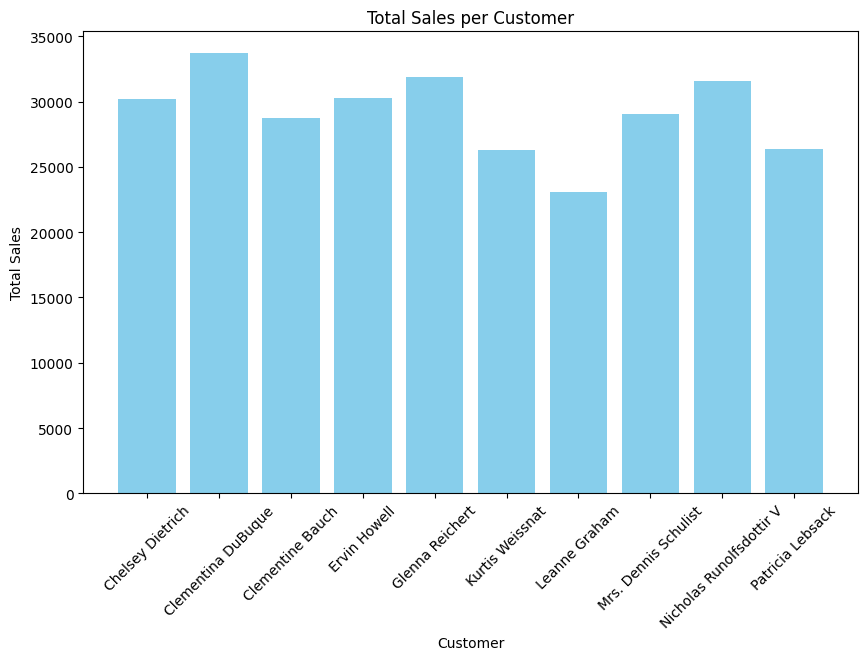

In [20]:
#Changing datatypes and Visualizations:

merged_df['order_date'] = pd.to_datetime(merged_df['order_date']) #change orderdate to datetime 

# Calculate total sales amount per customer and create new column
merged_df['total_sale'] = merged_df['quantity'] * merged_df['price']
sales_per_customer = merged_df.groupby('name')['total_sale'].sum().reset_index()

# Plot total sales per customer
plt.figure(figsize=(10, 6))
plt.bar(sales_per_customer['name'], sales_per_customer['total_sale'], color='skyblue')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.title('Total Sales per Customer')
plt.xticks(rotation=45)
plt.show()

The customer Clemetina Dubuque is the most valuable customer spending more than 35000 bucks

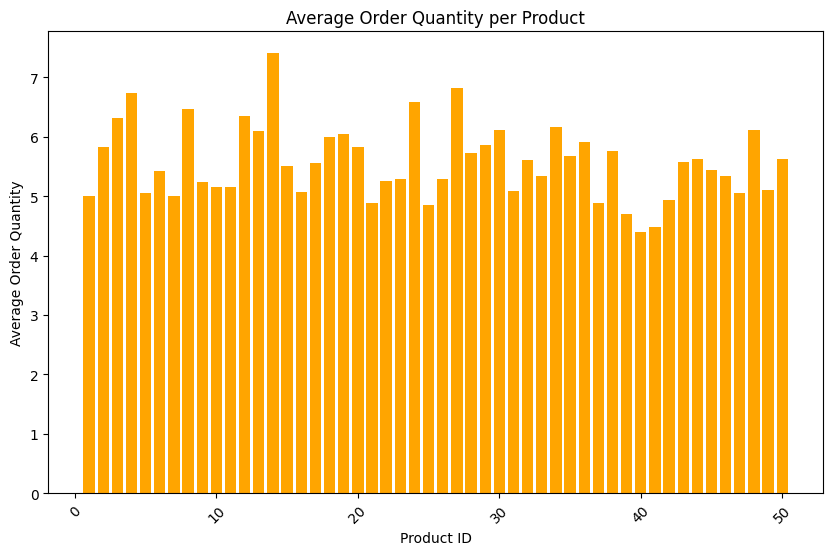

In [21]:
# Calculate average order quantity per product
avg_quantity_per_product = merged_df.groupby('product_id')['quantity'].mean().reset_index()

# Plot average order quantity per product
plt.figure(figsize=(10, 6))
plt.bar(avg_quantity_per_product['product_id'], avg_quantity_per_product['quantity'], color='orange')
plt.xlabel('Product ID')
plt.ylabel('Average Order Quantity')
plt.title('Average Order Quantity per Product')
plt.xticks(rotation=45)
plt.show()

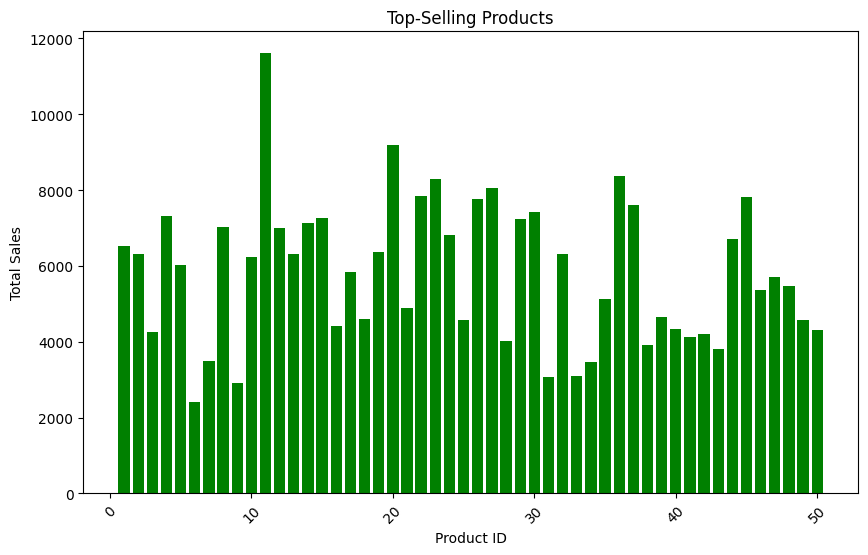

In [22]:
# Identify top-selling products
top_selling_products = merged_df.groupby('product_id')['total_sale'].sum().reset_index().sort_values(by='total_sale', ascending=False)
# Plot top-selling products (unchanged)
plt.figure(figsize=(10, 6))
plt.bar(top_selling_products['product_id'], top_selling_products['total_sale'], color='green')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Top-Selling Products')
plt.xticks(rotation=45)
plt.show()

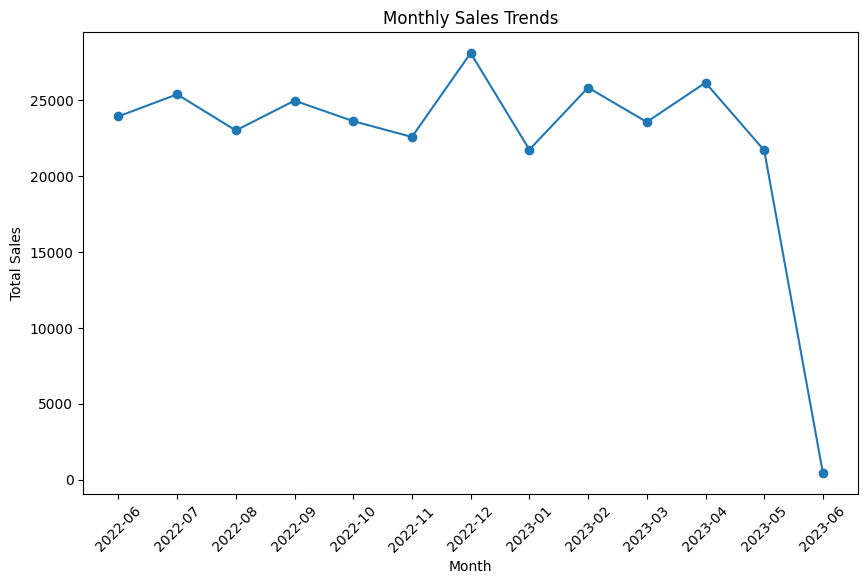

In [23]:
# Analyze sales trends over time (monthly sales)
merged_df['month'] = merged_df['order_date'].dt.to_period('M')
monthly_sales = merged_df.groupby('month')['total_sale'].sum().reset_index()

# Plot monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['total_sale'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.show()

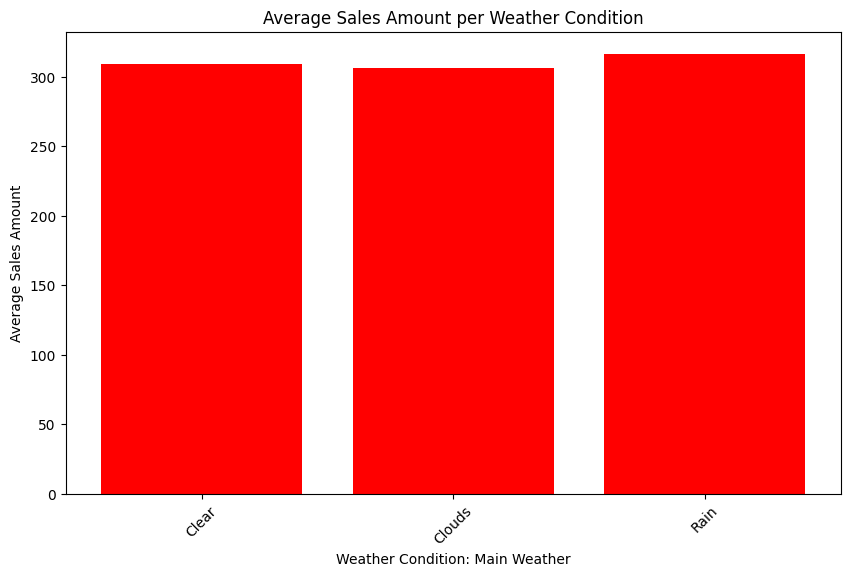

In [24]:
# Average sales amount per weather condition
avg_sales_per_weather = merged_df.groupby('main_weather')['total_sale'].mean().reset_index()
# Plot average sales per weather condition
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_per_weather['main_weather'], avg_sales_per_weather['total_sale'], color='red')
plt.xlabel('Weather Condition: Main Weather')
plt.ylabel('Average Sales Amount')
plt.title('Average Sales Amount per Weather Condition')
plt.xticks(rotation=45)
plt.show()


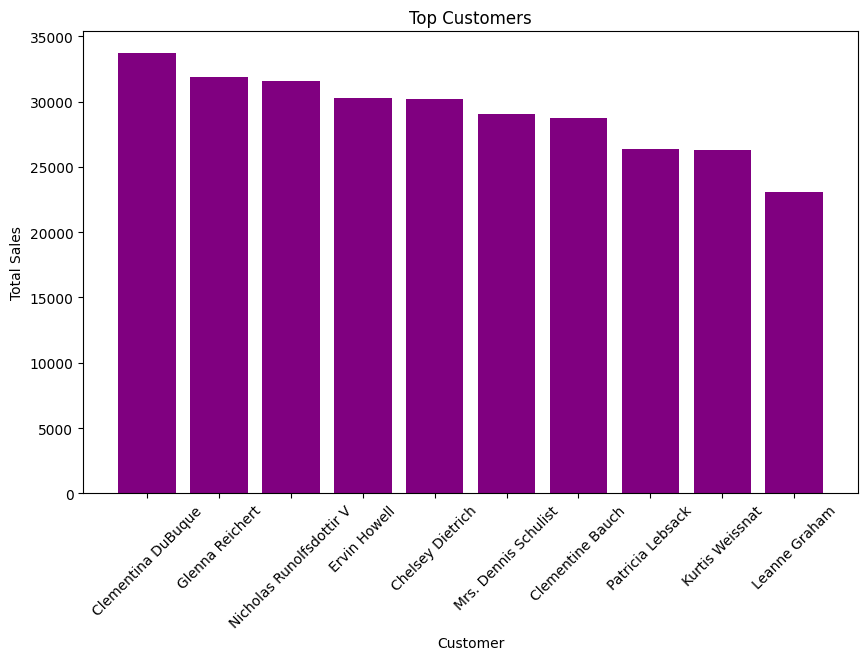

In [25]:
# Identify top customers
top_customers = merged_df.groupby('name')['total_sale'].sum().reset_index().sort_values(by='total_sale', ascending=False)
# Plot top customers
plt.figure(figsize=(10, 6))
plt.bar(top_customers['name'], top_customers['total_sale'], color='purple')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.title('Top Customers')
plt.xticks(rotation=45)
plt.show()

In [26]:

conn=sqlite3.connect("sales_data_pipeline.db")

In [27]:
desired_format = '%Y-%m-%d'  
merged_df['order_date_str'] = merged_df['order_date'].dt.strftime(desired_format)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        945 non-null    int64         
 1   customer_id     945 non-null    int64         
 2   product_id      945 non-null    int64         
 3   quantity        945 non-null    int64         
 4   price           945 non-null    float64       
 5   order_date      945 non-null    datetime64[ns]
 6   name            945 non-null    object        
 7   username        945 non-null    object        
 8   email           945 non-null    object        
 9   city            945 non-null    object        
 10  lat             945 non-null    object        
 11  lng             945 non-null    object        
 12  main_weather    945 non-null    object        
 13  description     945 non-null    object        
 14  temperature     945 non-null    float64       
 15  feels_

In [28]:
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS Sales_Table")


table_schema = """
CREATE TABLE IF NOT EXISTS Sales_Table (
  order_id INT,
  customer_id INT,
  product_id INT,
  quantity INT,
  price REAL,
  name TEXT,
  username TEXT,
  email TEXT,
  lat REAL,
  lng REAL,
  main_weather TEXT,
  description TEXT,
  temperature REAL,
  feels_like REAL,
  humidity INT,
  pressure REAL,
  order_date_str TEXT,
  PRIMARY KEY (order_id)
)
"""

# Execute the CREATE TABLE statement
cursor.execute(table_schema)
for index, row in merged_df.iterrows():
    data = (
    row['order_id'],
    row['customer_id'],
    row['product_id'],
    row['quantity'],
    row['price'],
    row['name'],
    row['username'],
    row['email'],
    row['lat'],  # Include 'lat' value
    row['lng'],
    row['main_weather'],
    row['description'],
    row['temperature'],
    row['feels_like'],
    row['humidity'],
    row['pressure'],
    row['order_date_str']
)

# Execute the INSERT statement
cursor.execute("""
    INSERT INTO Sales_Table (
        order_id, customer_id, product_id, quantity, price,name, username, email,lat,lng,
        main_weather, description, temperature, feels_like, humidity, pressure,order_date_str
    )
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,?)
""", data)

# Commit changes to the database
conn.commit()

# Close the cursor and connection
cursor.close()
conn.close()